                                            TERM DEPOSIT PREDICTION PROJECT

                                          BANK MARKETING: Predicting Whether 
                                  The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

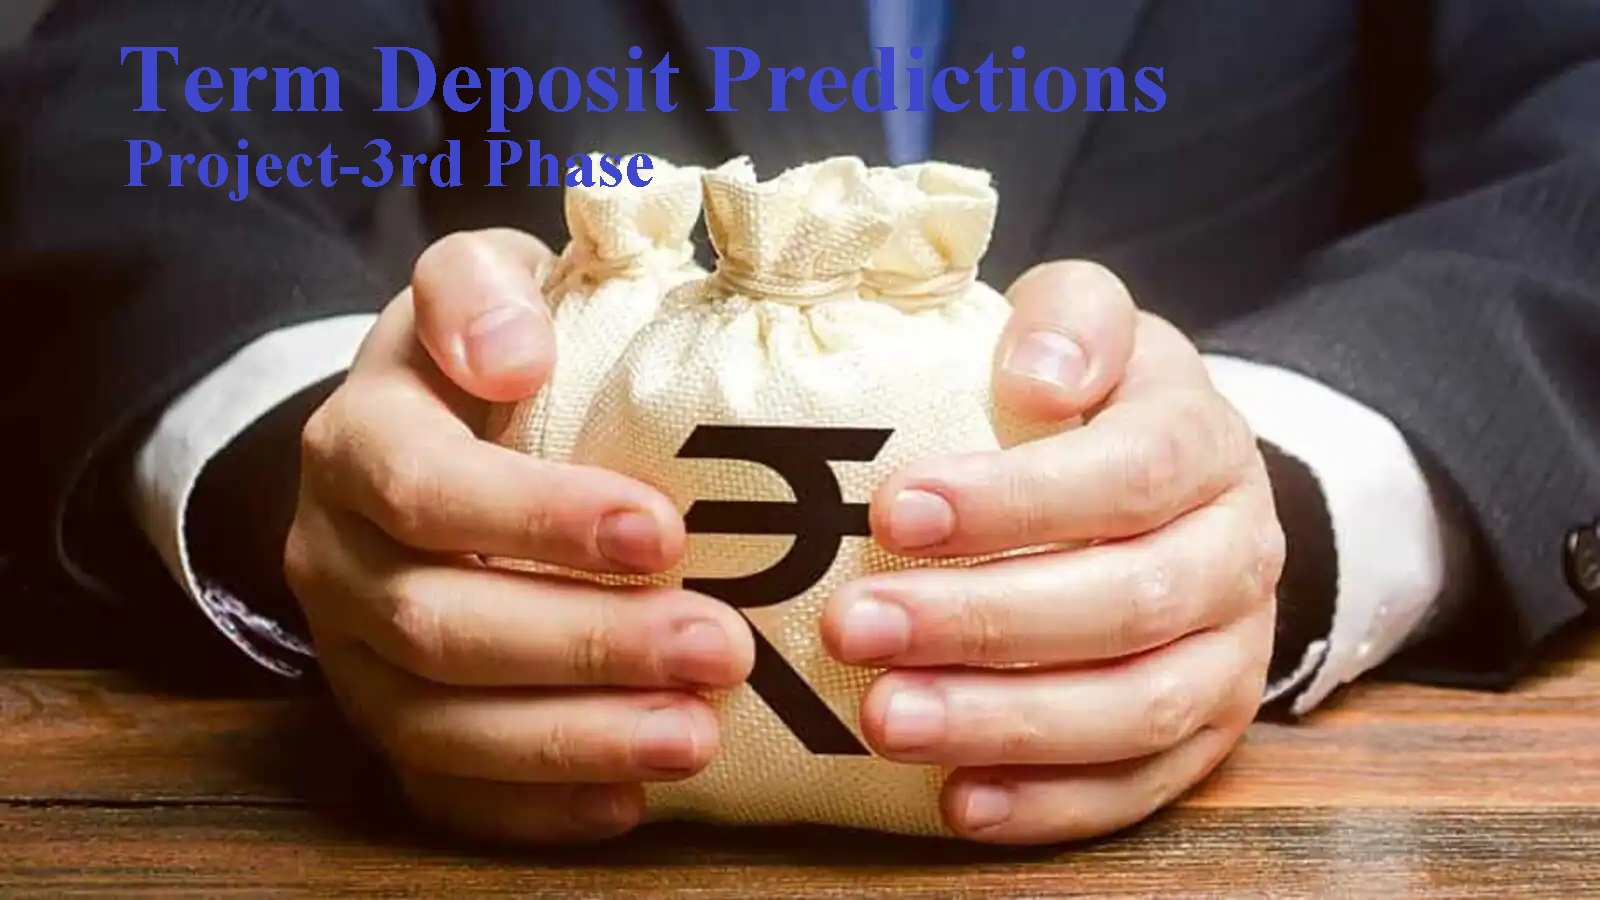

Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

Dataset Attributes

Here is the description of all the variables: • Variable: Definition • ID: Unique client ID • age: Age of the client • job: Type of job • marital: Marital status of the client • education: Education level • default: Credit in default. • housing: Housing loan • loan: Personal loan • contact: Type of communication • month: Contact month • day_of_week: Day of week of contact • duration: Contact duration • campaign: number of contacts performed during this campaign to the client • pdays: number of days that passed by after the client was last contacted • previous: number of contacts performed before this campaign • poutcome: outcome of the previous marketing campaign

Output variable (desired target): •Subscribed (target): has the client subscribed a term deposit? (YES/NO)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Importing important librarires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Uploading the dataset

In [3]:
Term_deposit=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

Checking the heads of Term Insurance Data set

In [3]:
Term_deposit.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


Checking the last five rows of Term Deposit Data Set

In [4]:
Term_deposit.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


Checking the shape of Term Deposit Data Set

In [3]:
Term_deposit.shape

(31647, 18)

In [6]:
print('The Term Deposit data has',Term_deposit.shape)

The Term Deposit data has (31647, 18)


Checking the null value or missing value in Term Deposit Data Set

In [7]:
Term_deposit.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We have no missing value in Term Deposit Data Set

Checking the type of objects in Term Deposit Data Set

In [8]:
Term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Lets check the duplicate value in Term Deposit data.

In [9]:
Term_deposit.duplicated().sum()

0

We have no duplicated vale in Term Deposit data.

Lets check the unique values in our  Coloumns

In [10]:
Term_deposit.nunique().to_frame("No of unique values ")

,No of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


Checking the value counts in Catagorical coloumn in Term Deposit data.

In [11]:
Term_deposit['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [12]:
Term_deposit['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [13]:
Term_deposit['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [14]:
Term_deposit['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [18]:
Term_deposit['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

In [19]:
Term_deposit['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [16]:
Term_deposit['education'].value_counts()

1    16224
2     9301
0     4808
3     1314
Name: education, dtype: int64

In [20]:
Term_deposit.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [46]:
categorical_col=[]
for i in Term_deposit.dtypes.index:
    if Term_deposit.dtypes[i]=="object":
        categorical_col.append(i)
print("Categrorical Columns: ",categorical_col)
print("\n")
        

Categrorical Columns:  ['subscribed']




Data Visualization of Term Deposit Data Set

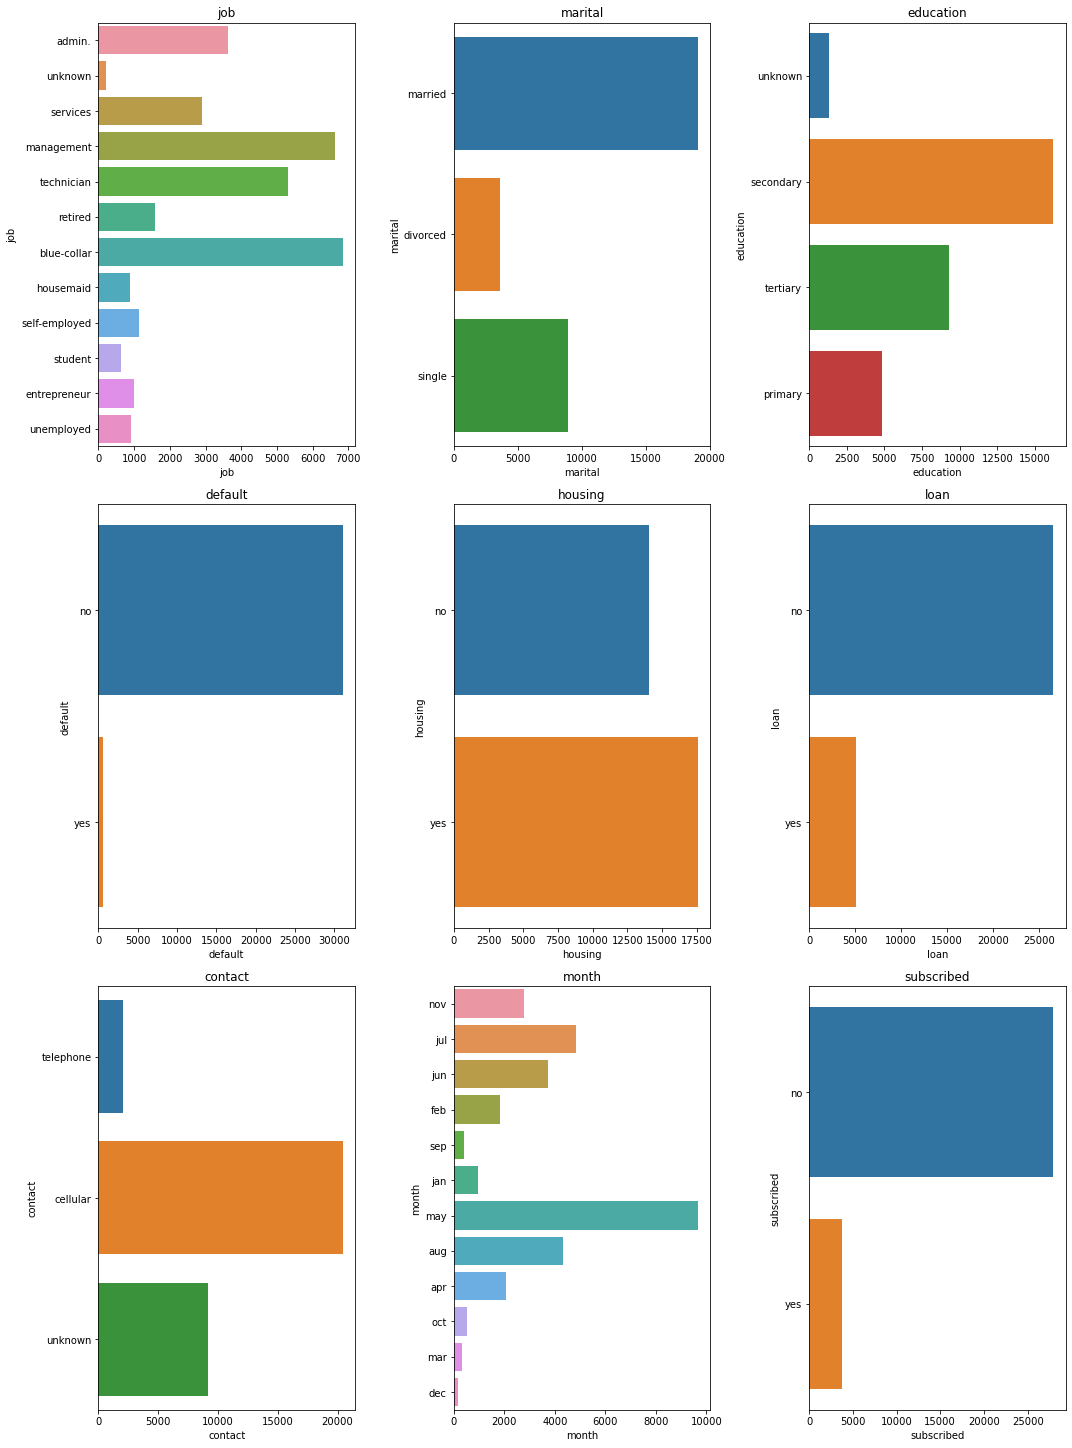

In [23]:
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','subscribed']

for categorical_col in categorical_cols:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(y=categorical_col, data=Term_deposit)
    plt.xlabel(categorical_col)
    plt.title(categorical_col)
    plotnumber += 1

plt.tight_layout()
plt.show()


Correlation Checking

<AxesSubplot:>

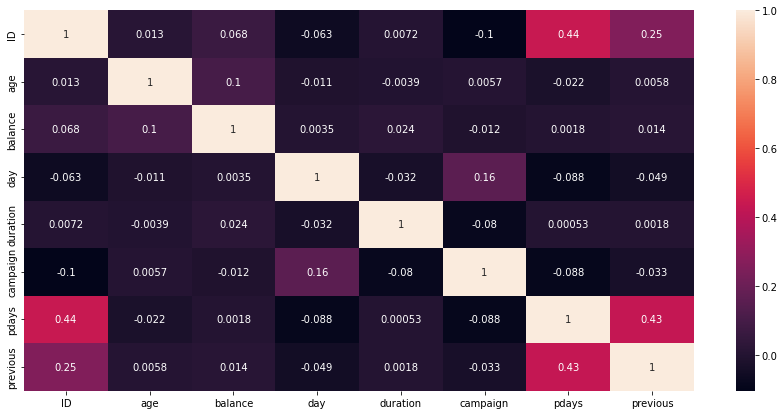

In [24]:
Correlation=Term_deposit.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(Correlation,annot=True)

Split the feature and target variable.

In [7]:
X = Term_deposit.drop('subscribed', axis=1)
y=Term_deposit['subscribed']

Checking X and Y

In [8]:
X

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,0,0,3
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,0,0,3
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,0,0,3
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,79,3,2
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,0,0,3
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,0,0,3
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,0,0,3
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,332,12,0


In [9]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

In [10]:
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome','subscribed']
for col in categorical_cols:
    Term_deposit[col] = label_encoder.fit_transform(Term_deposit[col])

In [11]:
Term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          31647 non-null  int64
 1   age         31647 non-null  int64
 2   job         31647 non-null  int64
 3   marital     31647 non-null  int64
 4   education   31647 non-null  int64
 5   default     31647 non-null  int64
 6   balance     31647 non-null  int64
 7   housing     31647 non-null  int64
 8   loan        31647 non-null  int64
 9   contact     31647 non-null  int64
 10  day         31647 non-null  int64
 11  month       31647 non-null  int64
 12  duration    31647 non-null  int64
 13  campaign    31647 non-null  int64
 14  pdays       31647 non-null  int64
 15  previous    31647 non-null  int64
 16  poutcome    31647 non-null  int64
 17  subscribed  31647 non-null  int64
dtypes: int64(18)
memory usage: 4.3 MB


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Using Decision Tree Classifier to train our data set.

In [13]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Make predictions on the validation set

In [21]:
y_pred = model.predict(X_val)

Calculate the accuracy of the model

In [22]:
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8848341232227488


Uploading the Test data of Term Deposit

In [56]:
Term_Test=pd.read_csv('	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

Checking the first five row of Test data set.

In [57]:
Term_Test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [58]:
Term_Test.shape

(13564, 17)

Encode the categorical variables in the test dataset

In [60]:
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']
for col in categorical_cols:
    Term_Test[col] = label_encoder.fit_transform(Term_Test[col])

In [62]:
predictions = model.predict(Term_Test)

In [63]:
predictions

array([0, 0, 0, ..., 0, 0, 0])